In [62]:
# este script construye la gráfica histórica
# del tamaño de bloques en Bitcoin

# este script construye un gráfico de la evolución del tamaño de bloques 
# a lo largo del cada bloque

#librerias a usar
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
from matplotlib import font_manager as fm, rcParams
import matplotlib.ticker as ticker
from datetime import datetime, timedelta
import locale
locale.setlocale(locale.LC_TIME, 'es')



fpath = os.path.join(r'bins/MonoLisaSimpson-Regular.ttf')
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]


# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
   (44, 44, 44), (255, 255, 248), (255, 255, 255), (255, 152, 150),  
   (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
   (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
   (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 

for i in range(len(tableau20)):    
   r, g, b = tableau20[i]    
   tableau20[i] = (r / 255., g / 255., b / 255.)   

# Cargamos los datos a usar como arrays

aux         =  np.load('bins/database.npz', allow_pickle='TRUE') 
n_block     =  aux['n_block']
time_b        =  aux['time_b']
size        =  aux['size']
ntx         =  aux['ntx']
bits        =  aux['bits']
chainwork = aux['chainwork']
strippedsize = aux['strippedsize']
weight = aux['weight']
total_btc = aux['total']
# Las fechas tienen un tratamiento especial.
# la mejor forma de hacerlo es pasarlos como objetos
# que matplot interpreta como fechas.

t


In [77]:
time_b[0]

datetime.date(2009, 1, 9)

In [63]:
# chainwork es una medida de dificultad acumulada.
# mide cuánto trabajo se ha realizado en una cadena 
# de bloques 

# el valor chainwork es el número total de intentos 
# de hash necesarios para producir todos los 
# bloques 

temp = []

for a in chainwork:
   b = int(a, 16)
   temp.append(b) #para ponerlo en escala exa

cw_dec = np.array(temp)


In [64]:
import math

def bits_to_difficulty(bits):
   bits = int(bits, 16)
   # Convertir bits a un número de 256 bits en formato big-endian
   target = (bits & 0x007fffff) * 2 ** (8 * ((bits >> 24) - 3)) 
   # Calcular la dificultad como el cociente entre el objetivo máximo y el objetivo actual
   max_target = 0xffff * 2 ** (8 * (0x1d - 3))
   difficulty = max_target / target
   return difficulty

dif_btc1 = []
for a in bits:
   v = bits_to_difficulty(a)
   dif_btc1.append(v)

dif_btc = np.array(dif_btc1)


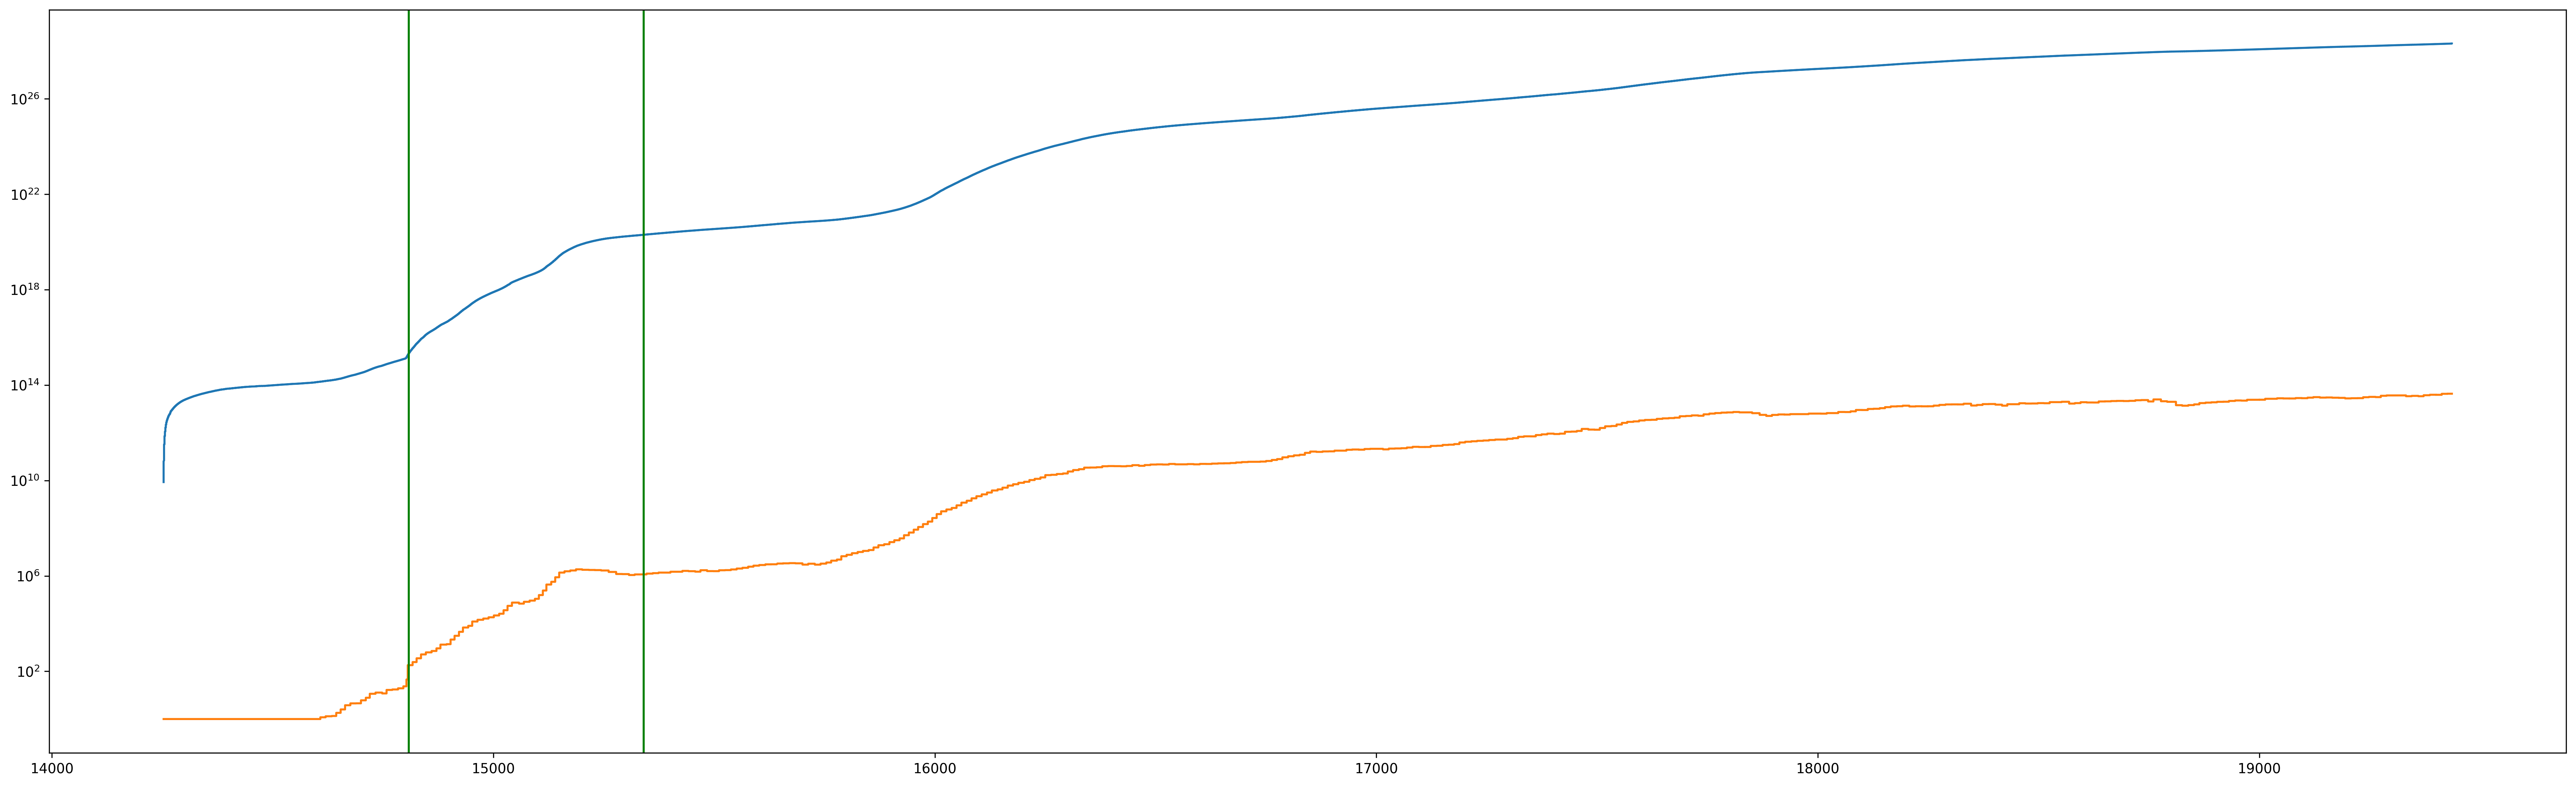

In [76]:
fig, ax = plt.subplots(figsize=(33,10),dpi=300)

plt.plot(num_dates,cw_dec)
plt.plot(num_dates,dif_btc)
plt.yscale('log')
#plt.xscale('log')

date_min = datetime(2010, 7, 18)
# Convertir la fecha a valor numérico en formato de número de días desde el inicio de la fecha
date_min_num = (date_min - datetime(1970, 1, 1)).total_seconds() / (24 * 60 * 60)
plt.axvline(date_min_num, color="g", label="Min") # Agregar línea vertical en la fecha especificada

date_min1 = datetime(2012, 1, 1)
# Convertir la fecha a valor numérico en formato de número de días desde el inicio de la fecha
date_min_num1 = (date_min1 - datetime(1970, 1, 1)).total_seconds() / (24 * 60 * 60)
plt.axvline(date_min_num1, color="g", label="Min") # Agregar línea vertical en la fecha especificada



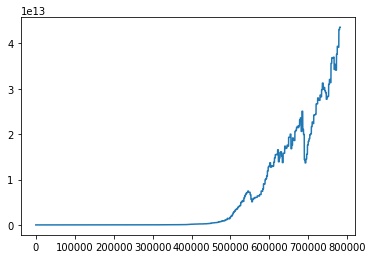

In [32]:
plt.plot(n_block,dif_btc)